# 911 Calls Capstone Project

## Data and Setup

In [17]:
import numpy as np
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('911.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [25]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

## Basic Questions About Data

** What are the top 5 zipcodes for 911 calls? **

In [29]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [32]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [35]:
df['title'].nunique()

110

## Creating new features and Exploring Data

In [38]:
df['reason']=df['title'].apply(lambda title: title.split(':')[0])

In [40]:
df['reason'].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

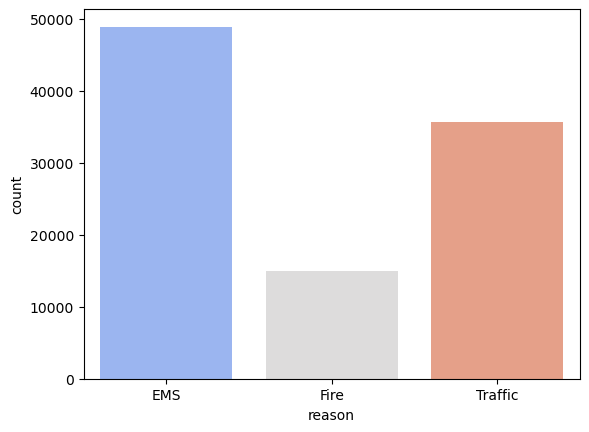

In [42]:
sns.countplot(x='reason',data=df,palette='coolwarm')

In [44]:
type('timeStamp')

str

In [46]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [48]:
df['month']=df['timeStamp'].apply(lambda time: time.month)
df['hour']=df['timeStamp'].apply(lambda time: time.hour)
df['day']=df['timeStamp'].apply(lambda time: time.dayofweek)

In [49]:
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [52]:
df['day']=df['day'].map(dmap)

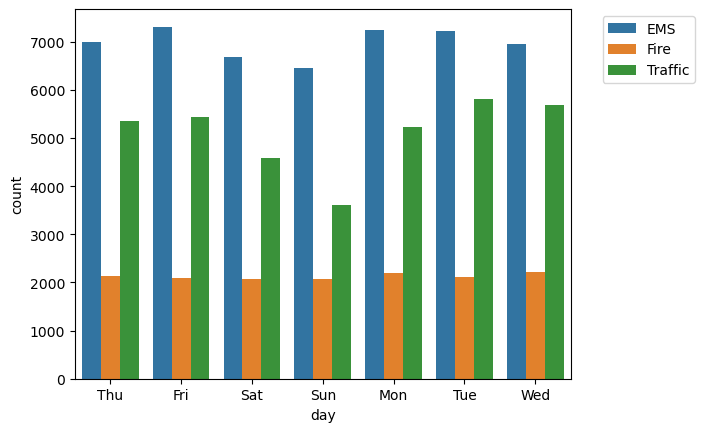

In [54]:
sns.countplot(x='day',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05,1))

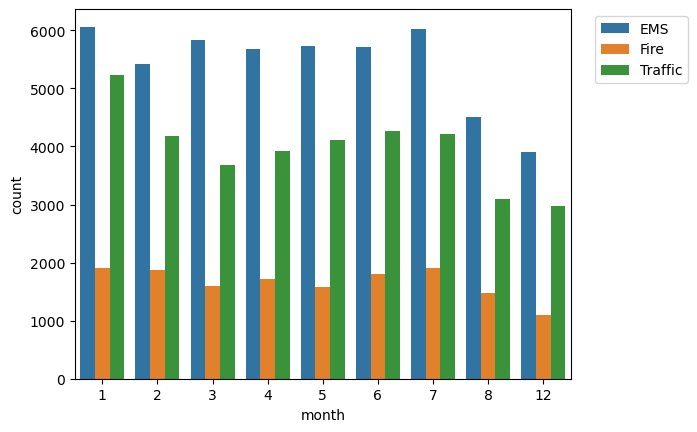

In [56]:
sns.countplot(x='month',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.25,1))

In [58]:
bymonth=df.groupby('month').count()
bymonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       reason   hour    day  
month                        
1       13205  13205  13205  
2       11467  11467  11467  
3       11101  11101  11101  
4       11326  11326  11326  
5       11423  11423  11423

<Axes: xlabel='month'>

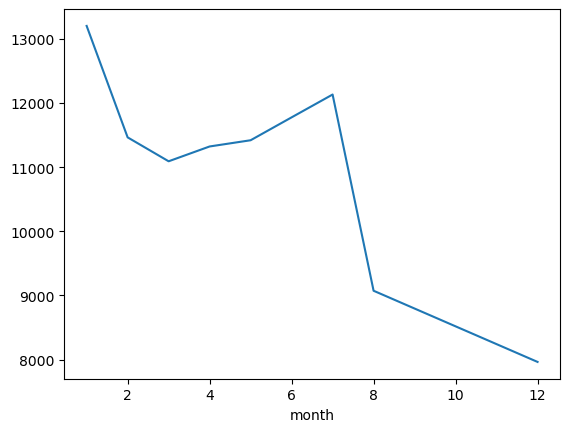

In [60]:
bymonth['twp'].plot()

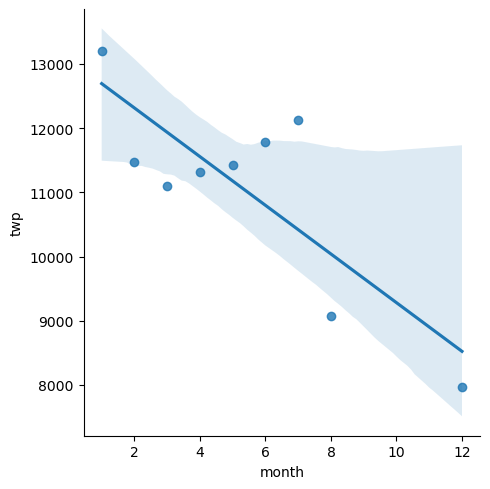

In [62]:
sns.lmplot(x='month',y='twp',data=bymonth.reset_index())

In [64]:
df['date']=df['timeStamp'].apply(lambda t: t.date())

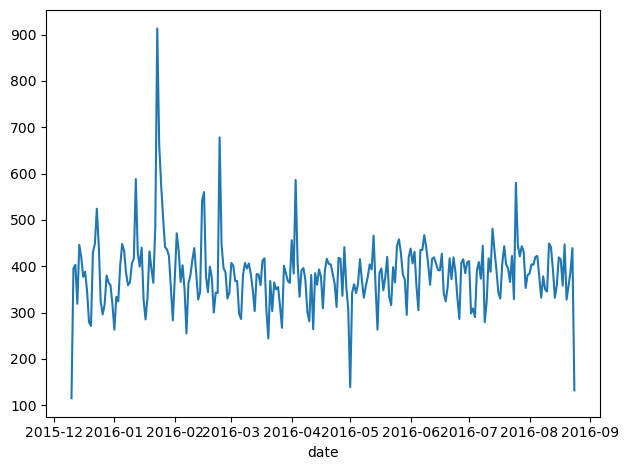

In [66]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

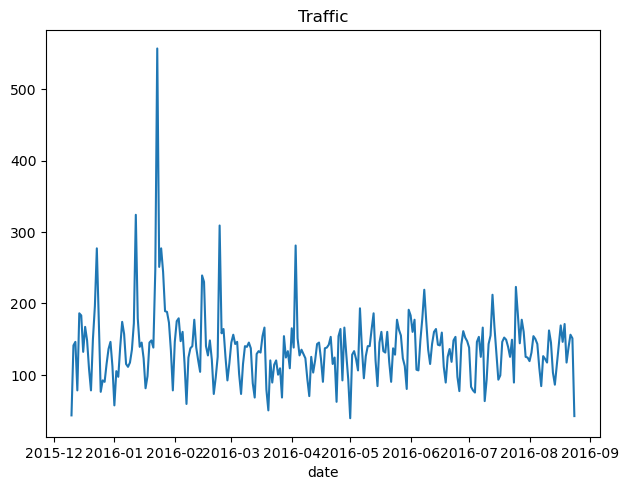

In [68]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

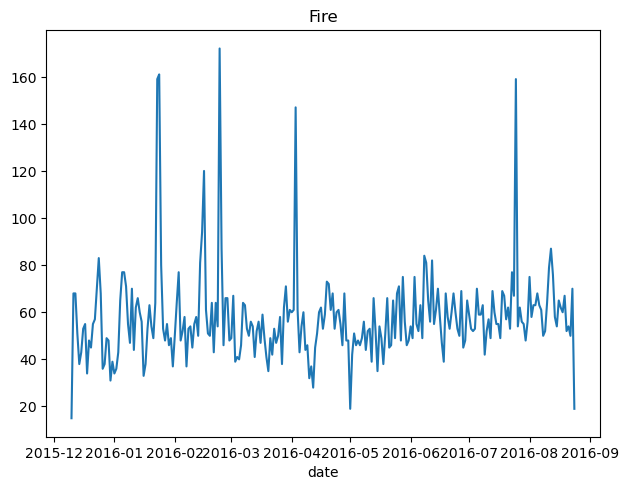

In [70]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

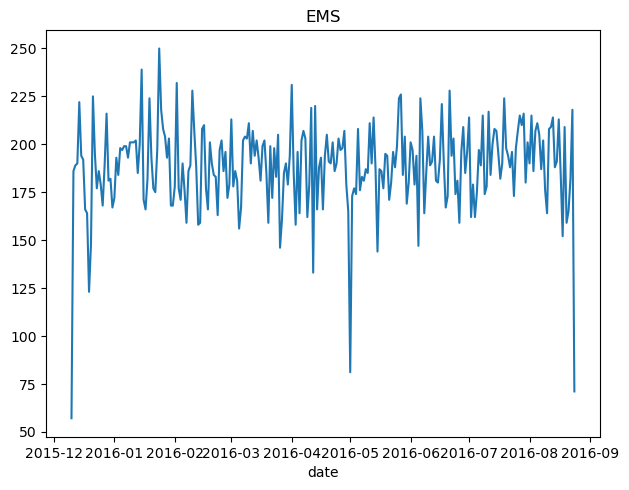

In [72]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')

In [74]:
dayhour=df.groupby(by=['day','hour']).count()['reason'].unstack()
dayhour.head()

hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16  \
day                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   

hour    17   18   19   20   21   22   23  
day                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  

[5 rows x 24 columns]

<Axes: xlabel='hour', ylabel='day'>

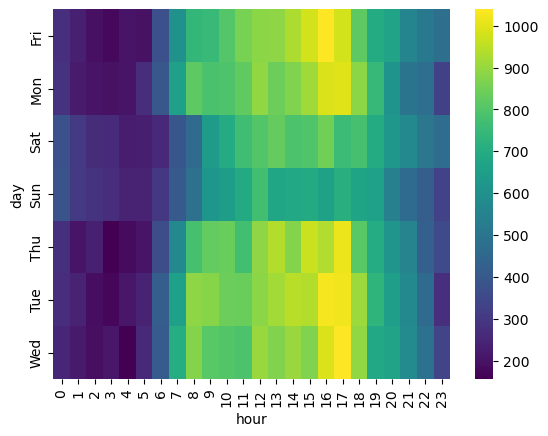

In [76]:
sns.heatmap(dayhour,cmap='viridis')

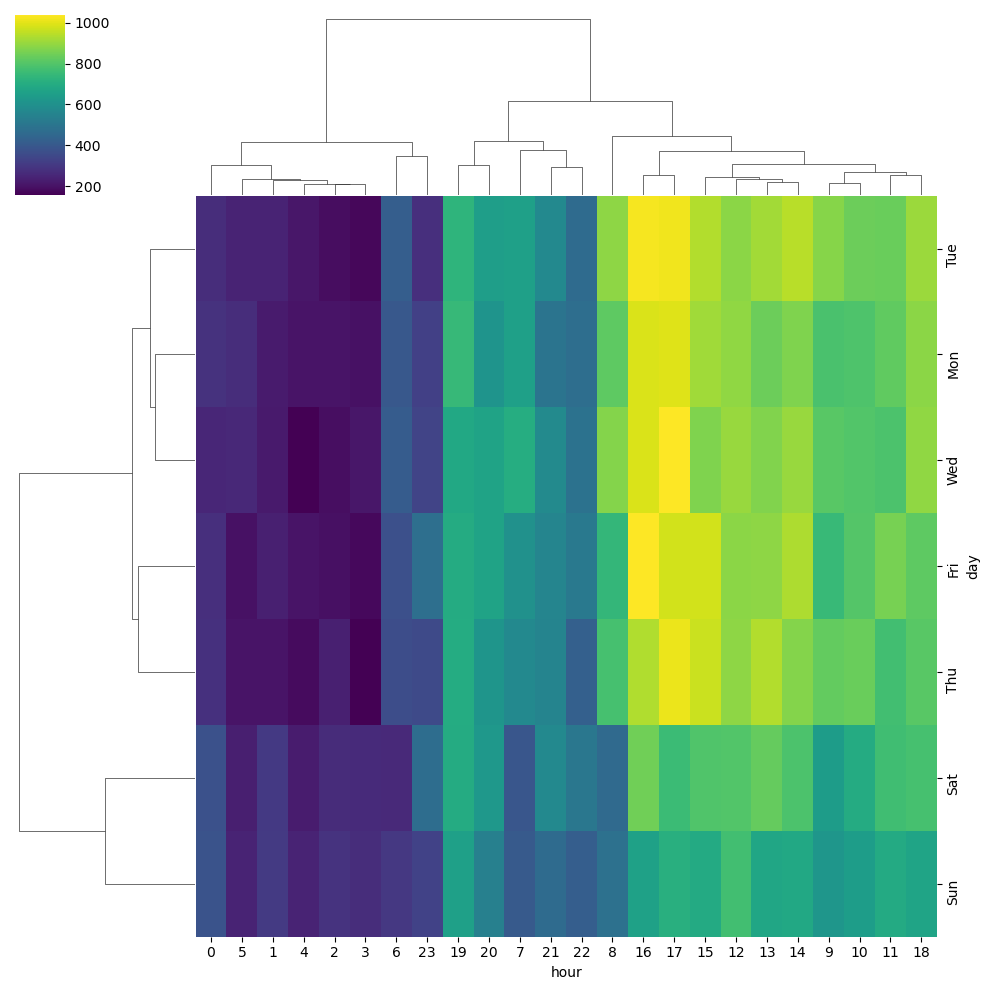

In [78]:
sns.clustermap(dayhour,cmap='viridis')

In [80]:
dm=df.groupby(by=['day','month']).count()['reason'].unstack()
dm.head()

month    1     2     3     4     5     6     7     8     12
day                                                        
Fri    1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon    1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat    2291  1441  1266  1734  1444  1388  1695  1099   978
Sun    1960  1229  1102  1488  1424  1333  1672  1021   907
Thu    1584  1596  1900  1601  1590  2065  1646  1230  1266

<Axes: xlabel='month', ylabel='day'>

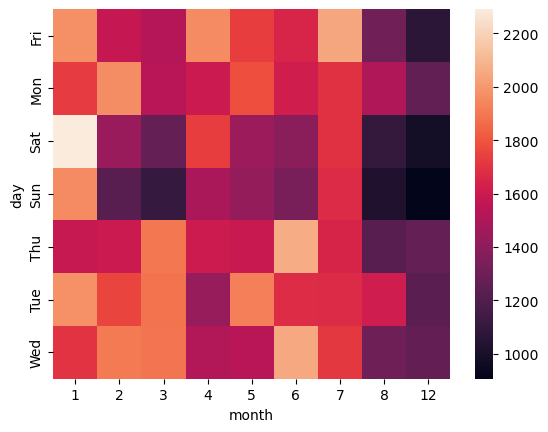

In [82]:
sns.heatmap(dm)

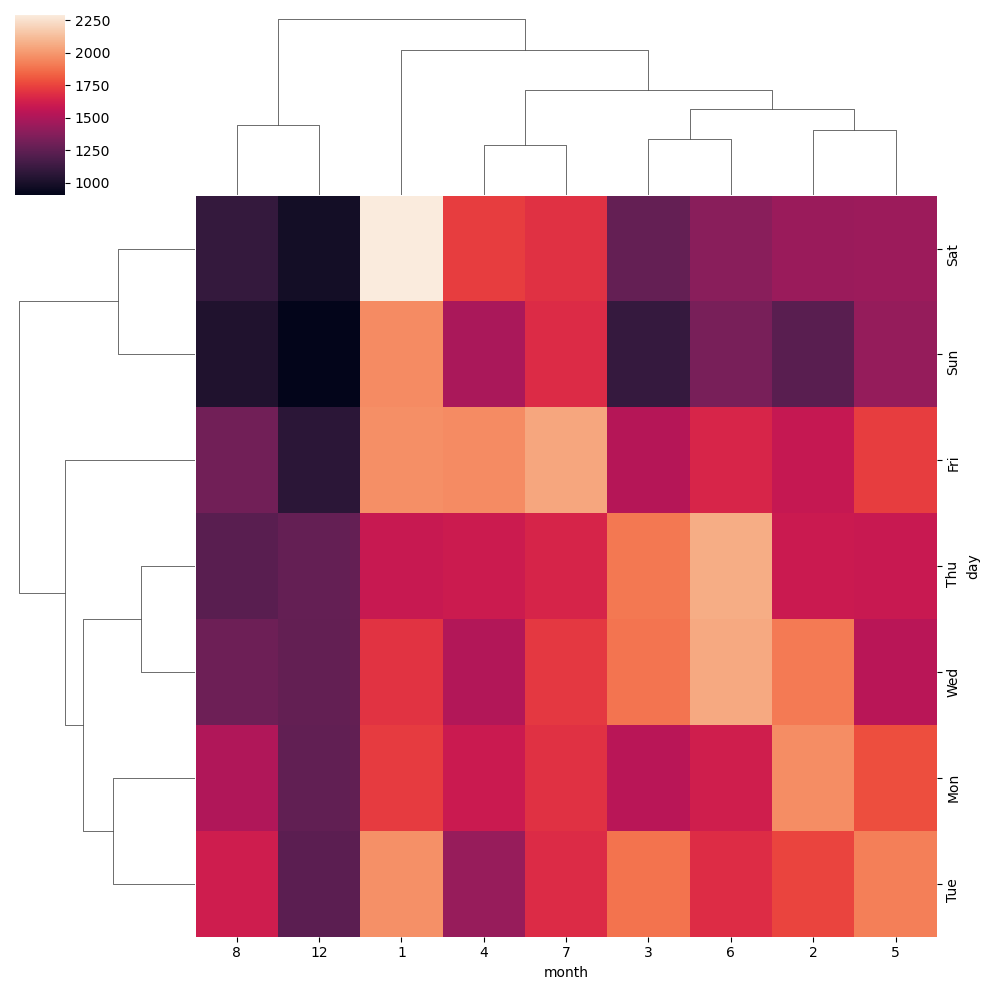

In [84]:
sns.clustermap(dm)